# Purchase Dataset Classification
## Loading & Preparing Data

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
#from sklearn.externals import joblib

#d_train = pd.read_csv("H:/Markus/purchase_ds/purchase600-100cls-15k.lrn.csv")

#d_test = pd.read_csv("H:/Markus/purchase_ds/purchase600-100cls-15k.tes.csv")

#d_sol_ex = pd.read_csv("H:/Markus/purchase_ds/purchase600-100cls-15k.sol.ex.csv")


d_train = pd.read_csv("./data/purchase600-100cls-15k.lrn.csv")

d_test = pd.read_csv("./data/purchase600-100cls-15k.tes.csv")

d_sol_ex = pd.read_csv("./data/purchase600-100cls-15k.sol.ex.csv")

In [31]:
X = d_train.iloc[:,1:601].values
y = d_train.iloc[:,601].values
X_kaggle_test = d_test.iloc[:,1:601].values


#Check if there are any duplicates in the dataset
boolean = d_train.duplicated(subset=['ID']).any()

if boolean == True:
    print("There are duplicates in column ID")
else:
    print("No duplicates found in column ID")

No duplicates found in column ID


0         0
476      16
589      20
524      60
443      91
       ... 
81     9575
55     9694
15     9730
3      9793
16     9865
Length: 600, dtype: int64


count    100.000000
mean     100.000000
std       43.928086
min        9.000000
25%       75.000000
50%       96.000000
75%      120.250000
max      267.000000
Name: ID, dtype: float64

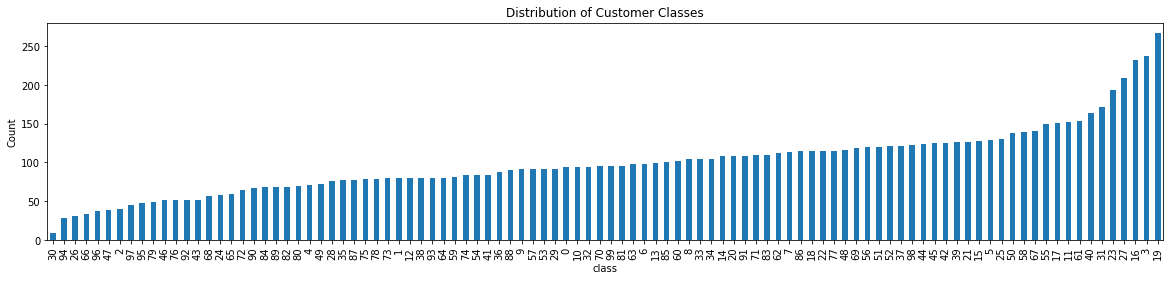

In [32]:
#d_train["class"].describe()
#Calculate and Plot number of Customers per Class
count_per_classes = d_train.groupby(['class'])['ID'].count().sort_values()
count_per_classes.plot(kind="bar", title="Distribution of Customer Classes", figsize=(20,4), ylabel="Count")

#Summarize the Number of each product in the dataset
sum_of_bought_prod = d_train.drop(columns=['ID', 'class']).sum(axis=0)
print(sum_of_bought_prod.sort_values())#.plot(kind="bar", title="Distribution of Bought Products", color="r")
sum_of_bought_prod.describe()
count_per_classes.describe()

## Dataset Description
The purchase dataset contains information about 10K customers and 600 binary attributes (product types), showing if a customer purchased the corresponding product or not. There are 100 classes in the target attribute. Each class represents a group of customers with similar purchase behaviour. The classification task is to predict the purchase behaviour of customers.

There is a big difference between the amount of customers in different classes ranging from class 30 with only 9 IDs contained in that class to class 19 with 267 IDs contained there.

We also encounter a big discrepancy looking at the products. There are products which are contained in almost every basket like number 16 with 9865 purchases and there are products like 0 with 0 purchases, which might be an error to be considered or product 476 with only 16 purchases. Maybe we will have to consider removing those outliers in order to improve prediction accuracy.

## Random Forest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [34]:
# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.33      0.43        15
           1       1.00      0.44      0.62         9
           2       1.00      0.33      0.50        12
           3       0.22      0.95      0.35        39
           4       0.67      1.00      0.80        14
           5       0.62      0.50      0.56        20
           6       0.63      1.00      0.77        17
           7       0.67      0.56      0.61        25
           8       0.46      0.89      0.60        18
           9       1.00      0.14      0.25        21
          10       1.00      0.13      0.23        23
          11       0.35      0.41      0.38        27
          12       0.38      0.38      0.38        13
          13       0.54      0.54      0.54        13
          14       0.25      0.41      0.31        17
          15       0.69      0.36      0.47        25
          16       0.36      0.86      0.51        49
          17       0.38    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
test_kaggle_pred = rf_classifier.predict(X_kaggle_test)

df = pd.DataFrame(test_kaggle_pred, d_test["ID"])
df.columns = ["class"]
df.to_csv('./data/output_df.csv')

### Show feature importance in Random Forest Classification

          IMPORTANCE    cumsum
VARIABLE                      
395         0.010441  0.010441
246         0.008653  0.019094
188         0.008365  0.027459
128         0.007603  0.035062
56          0.007510  0.042572


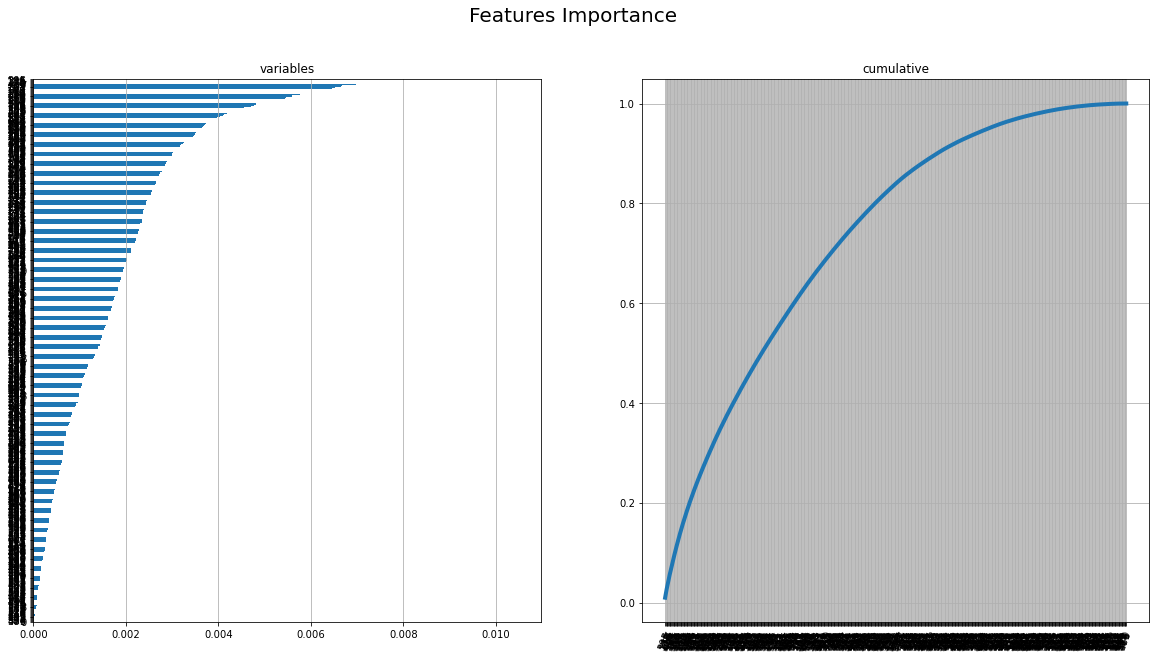

In [6]:
feature_names = d_train.drop(["ID","class"], axis=1).columns.tolist()
importances = rf_classifier.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({'IMPORTANCE':importances, 
            'VARIABLE':feature_names}).sort_values('IMPORTANCE', 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index('VARIABLE')
print(dtf_importances.head())

## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[['IMPORTANCE']].sort_values(by='IMPORTANCE').plot(figsize=(20,10), kind='barh', legend=False, ax=ax[0]).grid(axis='x')
ax[0].set(ylabel='')
ax[1].title.set_text('cumulative')
dtf_importances[['cumsum']].plot(kind='line', linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

Trying to reduce the number of variables by only selecting the most important ones

In [7]:
variable_subset = dtf_importances[dtf_importances["IMPORTANCE"]>0.005]

X_names = variable_subset.index.tolist()
X_reduced = d_train[X_names].values

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size = 0.20, random_state = 21)


In [8]:
# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train_reduced, y_train_reduced)

# Predicting the Test set results
y_pred_reduced = rf_classifier.predict(X_test_reduced)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test_reduced,y_pred_reduced))
print(classification_report(y_test_reduced,y_pred_reduced))
print(accuracy_score(y_test_reduced, y_pred_reduced))

              precision    recall  f1-score   support

           0       0.10      0.07      0.08        15
           1       0.27      0.33      0.30         9
           2       0.29      0.17      0.21        12
           3       0.17      0.33      0.22        39
           4       0.41      0.50      0.45        14
           5       0.23      0.35      0.27        20
           6       0.29      0.41      0.34        17
           7       0.17      0.20      0.18        25
           8       0.27      0.39      0.32        18
           9       0.15      0.14      0.15        21
          10       0.00      0.00      0.00        23
          11       0.22      0.26      0.24        27
          12       0.27      0.23      0.25        13
          13       0.00      0.00      0.00        13
          14       0.15      0.24      0.19        17
          15       0.33      0.20      0.25        25
          16       0.23      0.31      0.26        49
          17       0.16    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [9]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)
print("Accuracy:")
print(ac)

Confusion Matrix:
[[ 7  0  0 ...  0  1  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  2  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.47      0.25        15
           1       0.47      0.78      0.58         9
           2       0.42      0.83      0.56        12
           3       0.36      0.67      0.47        39
           4       0.44      0.57      0.50        14
           5       0.35      0.55      0.43        20
           6       0.26      1.00      0.41        17
           7       0.38      0.40      0.39        25
           8       0.27      0.61      0.37        18
           9       0.67      0.29      0.40        21
          10       0.27      0.17      0.21        23
          11       0.26      0.37      0.31        27
          12       0.19      0.46      0.27        13
          13       0.39      0.54      0.45   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LDA

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
lda_object = lda.fit(X_train, y_train)
X_lda = lda_object.transform(X_train)

y_pred = lda.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.60      0.43        15
           1       1.00      0.33      0.50         9
           2       0.73      0.67      0.70        12
           3       0.53      0.62      0.57        39
           4       0.71      0.71      0.71        14
           5       0.61      0.70      0.65        20
           6       0.68      0.76      0.72        17
           7       0.53      0.76      0.62        25
           8       0.56      0.56      0.56        18
           9       0.50      0.33      0.40        21
          10       0.41      0.30      0.35        23
          11       0.43      0.48      0.46        27
          12       0.67      0.46      0.55        13
          13       0.50      0.62      0.55        13
          14       0.30      0.35      0.32        17
          15       0.45      0.40      0.43        25
          16       0.62      0.78      0.69        49
          17       0.38    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
